In [1]:
import tweepy
from tweepy import OAuthHandler
from collections import Counter
from datetime import date
from tweepy import Cursor
import datetime
import pandas as pd 
import csv
import json
import os
import matplotlib.pyplot as plt

In [2]:
#Variables that contains the user credentials to access Twitter API
consumer_key = "" #API key
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Data Collection

In [4]:
#Followers Growth for 2 weeks
#Here is used to created the dataframe for the followers grwoth 
#The dataframe consists of Date and the Followers Count of the particular brand
frame = pd.DataFrame(columns = ['Date', 'Follower'])
frame.to_csv('follower.csv')

In [5]:
#Here is write the date and the followers count into the csv
#In our case, we saved it as follower.csv 
#In this follower.csv, it consists of 2 week grwoth of followers of a particular brand
from csv import writer

def append_list_as_row(file_name, list_of_elem):
    with open(file_name, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(list_of_elem)

username = api.get_user('Adidas')
today = date.today()
print("Today's date:", today)
follower_count = username.followers_count
print("Follower count:", follower_count)
row_contents = ['0', today, follower_count]
append_list_as_row('follower.csv', row_contents)

Today's date: 2021-02-09
Follower count: 3858674


In [6]:
#In this section, we create code to collect the one year data of the user time line of the particular brnad 
#So we have set the datetime starting from first day until last day of 2020
#The purpose of collecting the one year data is to determine some of the metrics such as Top Influencer, 
#Top Hashtags, Top Mentiones and the Active Time Period of the particular brand
#Besides, we also create the code to determine the statistic of the content for the particular brand 
def getUserTimelineOneYear(screen_name):
    startDate = datetime.datetime(2020, 1, 1)
    endDate =   datetime.datetime(2021, 1, 1)
    dirname = '/output/'
    os.makedirs(dirname, mode=0o755, exist_ok=True)
    fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)
    print("Collecting home timeline statuses for", screen_name)
    count = 0
    with open(fname, 'w') as f:
        for page in Cursor(api.user_timeline, screen_name=screen_name, count=200).pages(20):
            for status in page:     
                if status.created_at > startDate and status.created_at < endDate:
                    f.write(json.dumps(status._json)+"\n")
                    count+=1
    print("Total Tweets Collected : ",count)
    print("Tweets Collected Succesfully")
    
getUserTimelineOneYear('Adidas')

Total Tweets Collected :  199
Tweets Collected Succesfully


# 5 Metrics, 1 Statistic

#### Followers Growth, Top Hashtags, Top Mentions, Top Influencer, Most Active Time Periods, Content Performances

### 1. Followers Growth 

In [3]:
df = pd.read_csv('output/follower_Adidas.csv')

In [4]:
df['Difference'] = df['Follower'].diff()
df = df.fillna(0)
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df

,Date,Follower,Difference
0,25/1/2021,3851934,0.0
1,26/1/2021,3852331,397.0
2,27/1/2021,3852735,404.0
3,28/1/2021,3852997,262.0
4,29/1/2021,3853304,307.0
5,30/1/2021,3853851,547.0
6,31/1/2021,3854094,243.0
7,1/2/2021,3854465,371.0
8,2/2/2021,3855043,578.0
9,3/2/2021,3855627,584.0


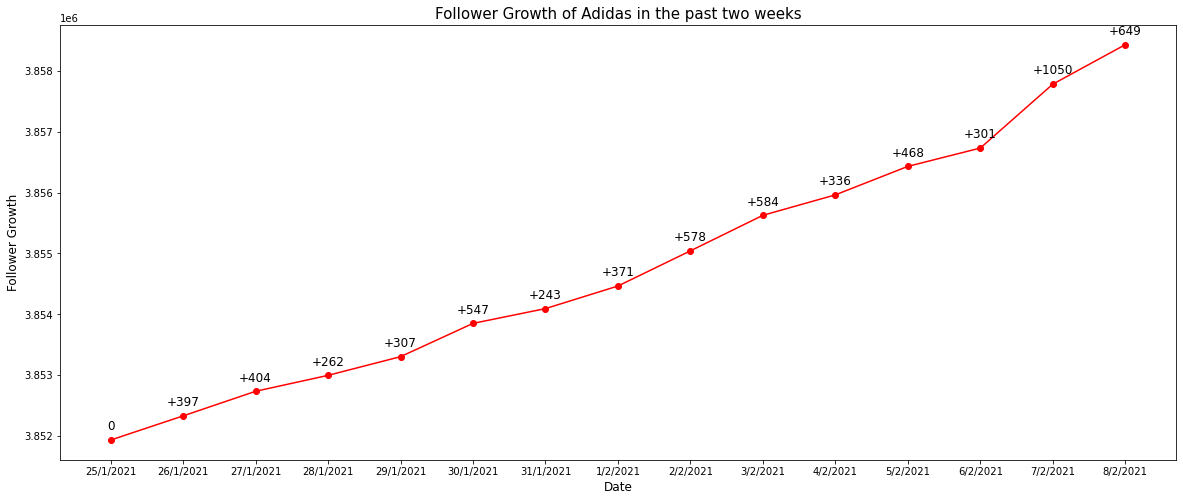

In [6]:
plt.figure(figsize=(20,8)) 
plt.plot(df['Date'], df['Follower'], 'ro-')
plt.xticks(rotation='horizontal')
plt.title('Follower Growth of Adidas in the past two weeks', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Follower Growth', fontsize = 12)

for x, y, z in zip(df['Date'], df['Follower'], df['Difference']):
    
    if z > 0:
        label = "+" + str(int(z))
    else:
        label = str(int(z))

    plt.annotate(label, (x, y), textcoords = "offset points", xytext = (0,10), ha = 'center', fontsize = 12)

plt.show()

### 2.Top Hashtags Based on User_Timeline 

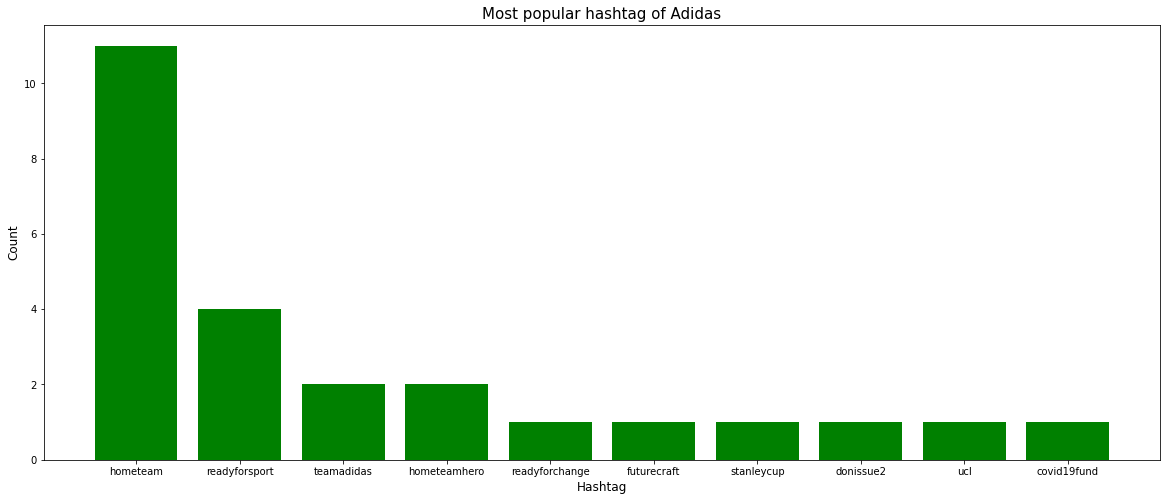

In [7]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

t = []
co = []
    
    
def getHashes(screen_name):
    if __name__ == '__main__':    
        #Jan-Feb Data
        #fname = "output/user_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #fname = "output/user_home_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #One year Data 
        fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)
        with open(fname, 'r') as f:
            hashtags = Counter()
            for line in f:
                tweet = json.loads(line)
                hashtags_in_tweet = get_hashtags(tweet)
                hashtags.update(hashtags_in_tweet)
            for tag, count in hashtags.most_common(10):
                t.append(tag)
                co.append(count)
                #print("{}: {}".format(tag, count))
                
        d = {'Hashtag': t, 'Count': co}
        df = pd.DataFrame(data = d)
        plt.figure(figsize=(20,8)) 
        plt.bar(df['Hashtag'], df['Count'], label = "Hashtag", color = 'green')
        plt.xlabel('Hashtag', fontsize = 12)
        plt.ylabel('Count', fontsize = 12)
        plt.title('Most popular hashtag of Adidas', fontsize = 15)
        plt.xticks(rotation = 'horizontal')
        
getHashes('Adidas')

### 3. Mentions Based on User_Timeline

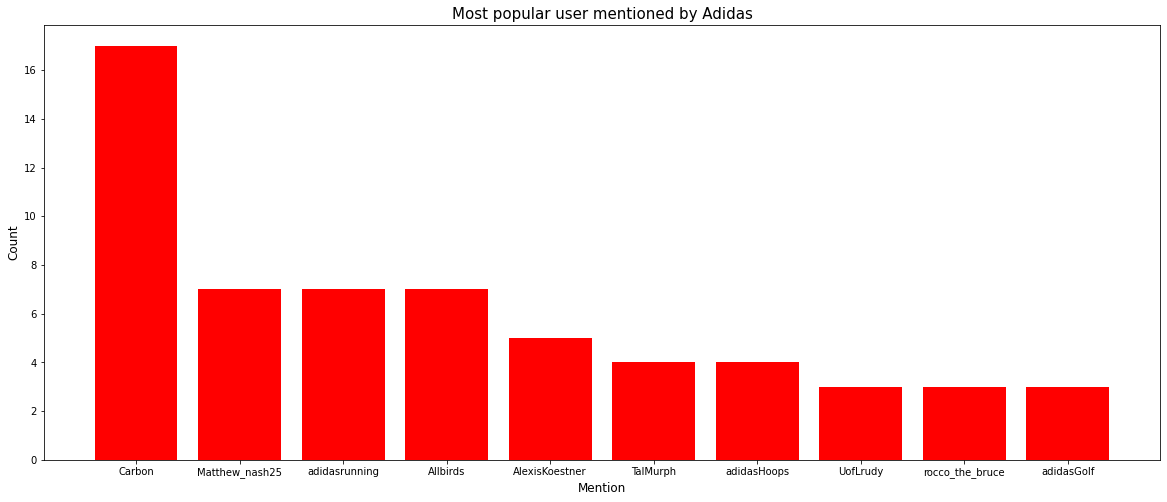

In [8]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

us = []
co = []

def getMentiones(screen_name):
    if __name__ == '__main__':
        #fname = "output/user_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #fname = "output/user_home_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #One year data 
        fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)

        with open(fname, 'r') as f:
            users = Counter()
            for line in f:
                tweet = json.loads(line)
                mentions_in_tweet = get_mentions(tweet)
                users.update(mentions_in_tweet)
            for user, count in users.most_common(10):
                us.append(user)
                co.append(count)
                #print("{}: {}".format(user, count))
                
    d = {'Mention': us, 'Count': co}
    df = pd.DataFrame(data = d)
    plt.figure(figsize=(20,8)) 
    plt.bar(df['Mention'], df['Count'], label = "Mention", color = 'red')
    plt.xlabel('Mention', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.title('Most popular user mentioned by Adidas', fontsize = 15)
    plt.xticks(rotation = 'horizontal')

getMentiones("Adidas")

### 4. Top Influencer

In [10]:
#For the top influencer, we collect the two weeks data that whose @Adidas the most 
def getquery(searchQuery,date = '2021-01-25'):
  dirname = '/output/'
  os.makedirs(dirname, mode=0o755, exist_ok=True)
  counter=0
  with open(dirname + 'searchQuery_'+searchQuery+'_before'+'_'+date+'.json','w') as f:
    for page in Cursor(api.search,q = searchQuery, until = date,count=200).pages(10):
      for status in page:
        f.write(json.dumps(status._json)+"\n")
        counter+=1
  print("Total %d searchQuery Tweets collected" % counter)

#In this for loop, we determine the date we want to collect
for i in range(25,31):
  date = '2021-01-'+str(i)
  print(date)
  #getquery("Adidas",date=date)

2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30


output/searchQuery_Adidas.json
['adidasUS', 'KamFBaby', 'adidas_ES', 'Poshmarkapp', 'FootbalIStuff']
[948253, 3732, 950494, 123446, 509923]
[347, 1597, 267, 4160, 85713]


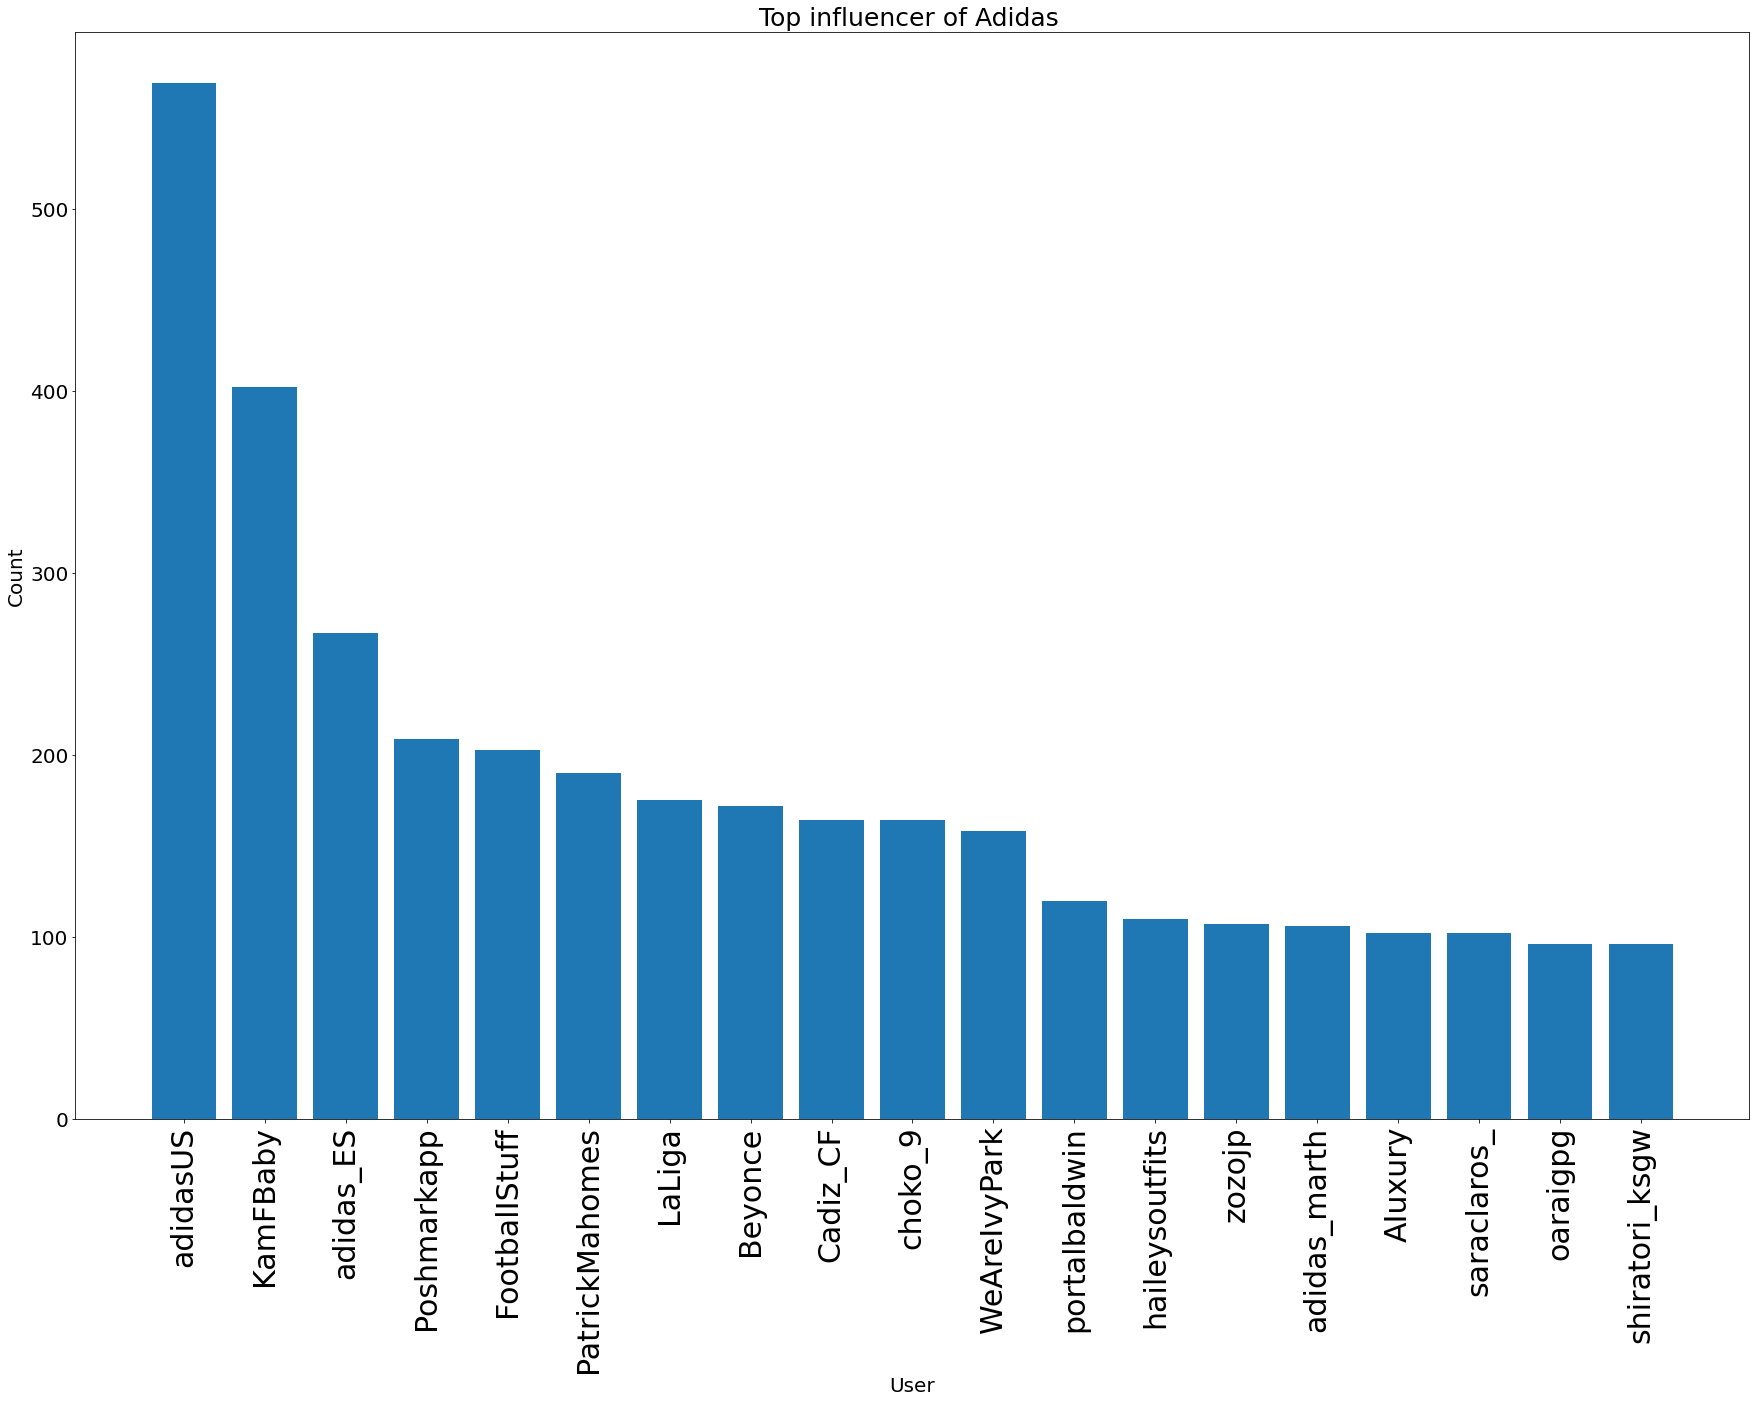

In [11]:
#After collecting the 14days of who @Adidas, we start to do the metric of Top Influencer here. 
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

us = []
co = []
fc = []
frc = []

def getMentiones(screen_name):
    if __name__ == '__main__':
        #for i in range(18,25):
        #fname = fdir + 'searchQuery_mgag_before'+'_'+date+'.json'
        fname = "output/searchQuery_Adidas.json"
        with open(fname, 'r') as f:
            users = Counter()
            for line in f:
                tweet = json.loads(line)
                mentions_in_tweet = get_mentions(tweet)
                users.update(mentions_in_tweet)
            for user, count in users.most_common(20):
                us.append(user)
                co.append(count)
                #print("{}: {}".format(user, count))
    
        d = {'User': us, 'Count': co}
        df = pd.DataFrame(data = d)
        df = df.drop(df.index[0])
        plt.figure(figsize=(30,20)) 
        plt.bar(df['User'], df['Count'], label = "Mentions")
        plt.xlabel('User', fontsize = 20)
        plt.ylabel('Count', fontsize = 20)
        plt.title('Top influencer of Adidas ', fontsize = 25)
        plt.xticks(rotation = 'vertical', fontsize=30)
        plt.yticks(fontsize = 20)
        print(fname)
        print(us[1:6])
        for user in us[1:6]:
            username = api.get_user(user)
            follower_count = username.followers_count
            fc.append(follower_count)
            friend_count = username.friends_count
            frc.append(friend_count)
        print(fc)
        print(frc)
getMentiones("Adidas")

### 5. Most Active Time

       date  favorite_count  retweet_count
10  Jan2020           29474          11454
9   Feb2020           36206           4116
8   Mar2020            6444           1471
7   Apr2020            6540           1430
6   May2020          236305          73725
5   Jun2020           20408           3334
4   Aug2020           12260           4821
3   Sep2020            4136            734
2   Oct2020            5368           1635
1   Nov2020               3             68
0   Dec2020            2391            855


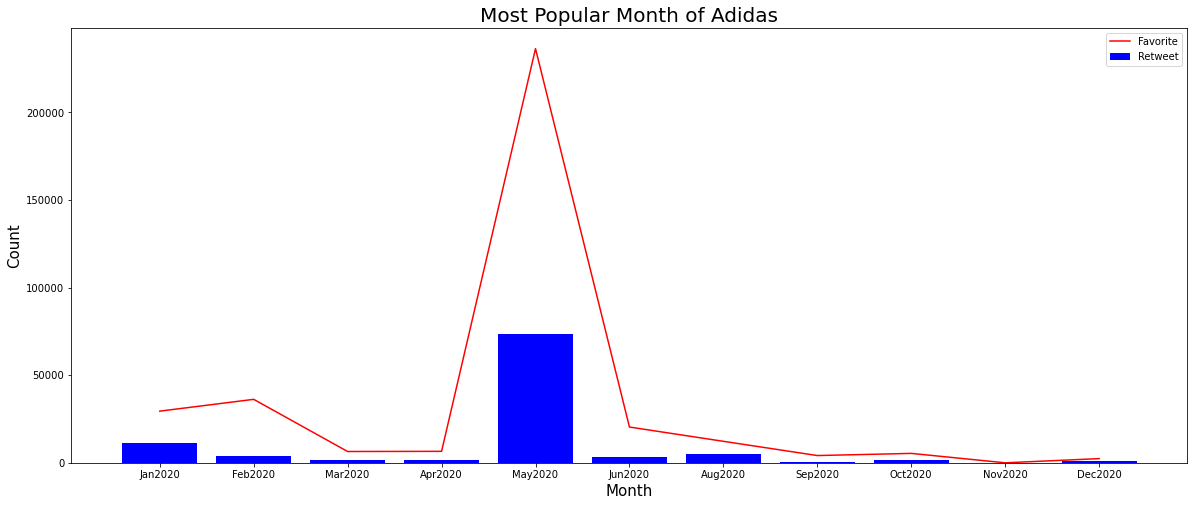

In [14]:
def getActiveHomeTimeLine(period, screen_name):
    #One month data
    #file = 'output/user_home_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    #file = 'output/user_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    #One year data 
    file = 'output/user_timeline_{}_between_2020-2021.json'.format(screen_name)
    dic = {"date":[],"favorite_count":[], "retweet_count":[]}
    with open(file) as f:
        for line in f:
            tweet = json.loads(line)
            favCount = tweet['favorite_count']
            retCount = tweet['retweet_count']
            d = tweet['created_at'].split(' ')
            #print(d)
            if period=='daily':
                d = d[2]+d[1]+d[5]
            elif period=='monthly':
                d = d[1]+d[5]
            elif period=='yearly':
                d = d[5]
            if d not in dic['date']:
                dic['date'].append(d)
                dic['favorite_count'].append(favCount)
                dic['retweet_count'].append(retCount)
            else:
                idx = dic['date'].index(d)
                dic['favorite_count'][idx] += favCount
                dic['retweet_count'][idx] += retCount
                
    df = pd.DataFrame(dic)
    df = df.iloc[::-1]
    plt.figure(figsize=(20,8)) 
    plt.plot(df['date'], df['favorite_count'], label = "Favorite", color = 'red')
    plt.bar(df['date'], df['retweet_count'], label = "Retweet", color = 'blue')
    plt.legend()
    plt.xlabel('Month', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title('Most Popular Month of Adidas', fontsize = 20)
    plt.xticks(rotation = 'horizontal')
    print(df)
getActiveHomeTimeLine('monthly',"Adidas")

### 6. Content Performance (Statistics)

In [17]:
#This is to get the January Text from the Adidas "User Timeline" and to conduct the analysis.
#This is used to downloaded dataset from the tweets collect functions
#Not the HOME TIMELINE OF ADIDAS!!
def getUserTimelineTweetPerformance(screen_name):
    #file = 'output/user_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    file = 'output/user_timeline_{}_between_2020-2021.json'.format(screen_name)
    dic = {"date":[],"favorite_count":[], "retweet_count":[]}
    count=0
    with open(file) as f:
        for line in f:
            tweet = json.loads(line)
            favCount = tweet['favorite_count']
            retCount = tweet['retweet_count']
            d = tweet['created_at'].split(' ')
            dic['date'].append(d)
            dic['favorite_count'].append(favCount)
            dic['retweet_count'].append(retCount)
            count += 1

    user = api.get_user(screen_name)
    followersCount = user.followers_count
    #print("Followers Count : ",followersCount)
    dfDaily = pd.DataFrame(dic)
    print("Statuses Count : ",count)
    favouritesCount = dfDaily['favorite_count'].sum()
    print("Favourites Count : ",favouritesCount)
    retweetsCount = sum(dfDaily['retweet_count'])
    print("Retweets Count : ",retweetsCount)
    avgFavouritesCount = round(favouritesCount / count, 4)
    print("Average Favourite Count : ",avgFavouritesCount)
    avgRetweetsCount = round(retweetsCount / count, 4)
    print("Average Tweets Count : ",avgRetweetsCount)

    favoritPerUser = round(favouritesCount / followersCount, 4)
    retweetPerUser = round(retweetsCount / followersCount, 4)

    print("\n----- Statistic {} based on Favourties and Retweets -----".format(screen_name))
    print("Total {} followers".format(followersCount))
    print("Favourited {} times ({} per tweet, {} per user)".format(favouritesCount, avgFavouritesCount, favoritPerUser))
    print("Retweeted {} times ({} per tweet, {} per user)".format(retweetsCount, avgRetweetsCount, retweetPerUser))
    
    #return pd.DataFrame(dic)
getUserTimelineTweetPerformance("Adidas")

Statuses Count :  199
Favourites Count :  359535
Retweets Count :  103643
Average Favourite Count :  1806.7085
Average Tweets Count :  520.8191

----- Statistic Adidas based on Favourties and Retweets -----
Total 3866763 followers
Favourited 359535 times (1806.7085 per tweet, 0.093 per user)
Retweeted 103643 times (520.8191 per tweet, 0.0268 per user)
